In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(23) 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from keras.layers import BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from keras.applications.resnet50 import ResNet50
from keras import backend as K 
from keras.optimizers import Adam, RMSprop

In [3]:
# Creating folders for train/test benign vs malignant images
folder_benign_train = '/Users/christan/Desktop/skin-cancer-group-2/data/train/benign'
folder_malignant_train = '/Users/christan/Desktop/skin-cancer-group-2/data/train/malignant'

folder_benign_test = '/Users/christan/Desktop/skin-cancer-group-2/data/test/benign'
folder_malignant_test = '/Users/christan/Desktop/skin-cancer-group-2/data/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [4]:
# Loading in training images 
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

In [5]:
# Loading in testing images
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [6]:
# Creating Labels
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

In [7]:
# Merging data 
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

In [8]:
# Shuffling data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

In [9]:
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

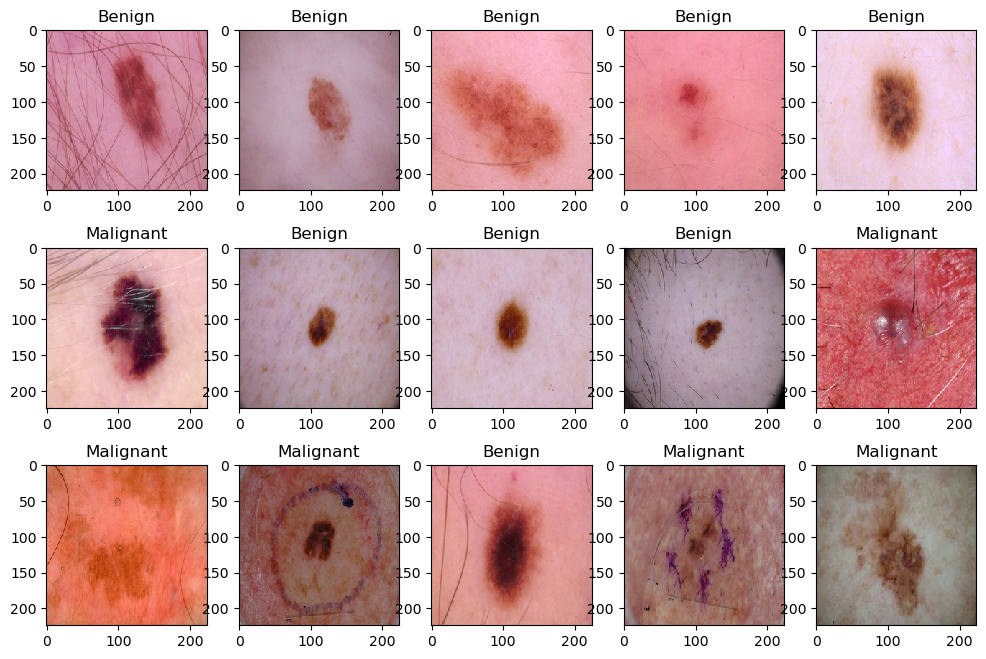

In [10]:
# Displaying first 15 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [11]:
# Turning Labels into one hot encoding
y_train = to_categorical(y_train, num_classes= 2)
y_test = to_categorical(y_test, num_classes= 2)

In [12]:
# Normalizing all values of the pictures
X_train = X_train/255
X_test = X_test/255

In [14]:
# Define the CNN model architecture
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output before the fully connected layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 units for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 271s 3s/step - accuracy: 0.5863 - loss: 6.5356 - val_accuracy: 0.6288 - val_loss: 0.6678
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.6485 - loss: 0.6750 - val_accuracy: 0.6439 - val_loss: 0.6432
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.6436 - loss: 0.7147 - val_accuracy: 0.7061 - val_loss: 0.6010
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 257s 3s/step - accuracy: 0.7352 - loss: 0.5656 - val_accuracy: 0.6470 - val_loss: 0.6308
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 256s 3s/step - accuracy: 0.6805 - loss: 0.5995 - val_accuracy: 0.6742 - val_loss: 0.5936
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 248s 3s/step - accuracy: 0.7707 - loss: 0.5034 - val_accuracy: 0.6970 - val_loss: 0.5913
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 251s 3s/step - accuracy: 0.8422 - loss: 0.3801 - val_accuracy: 0.7030 - val_loss: 0.6436
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.7996 - loss: 0.4401 - val_accuracy: 0.7530 - v

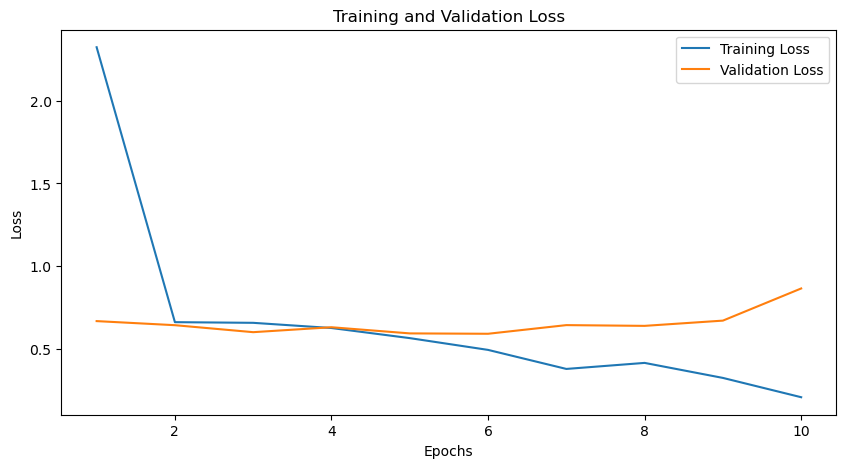

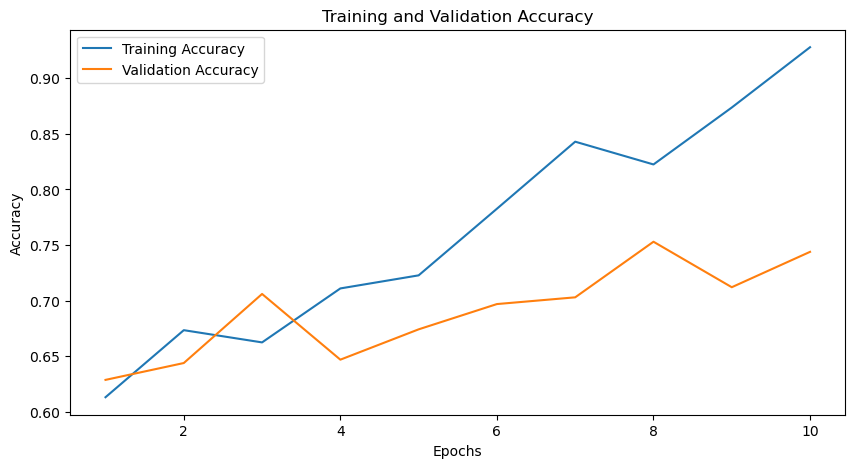

In [15]:
# Extract training and validation metrics
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot learning curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()